<a href="https://colab.research.google.com/github/guixann/portfolio/blob/main/Netflix_stock_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here we analyse netflix's past stock prices!

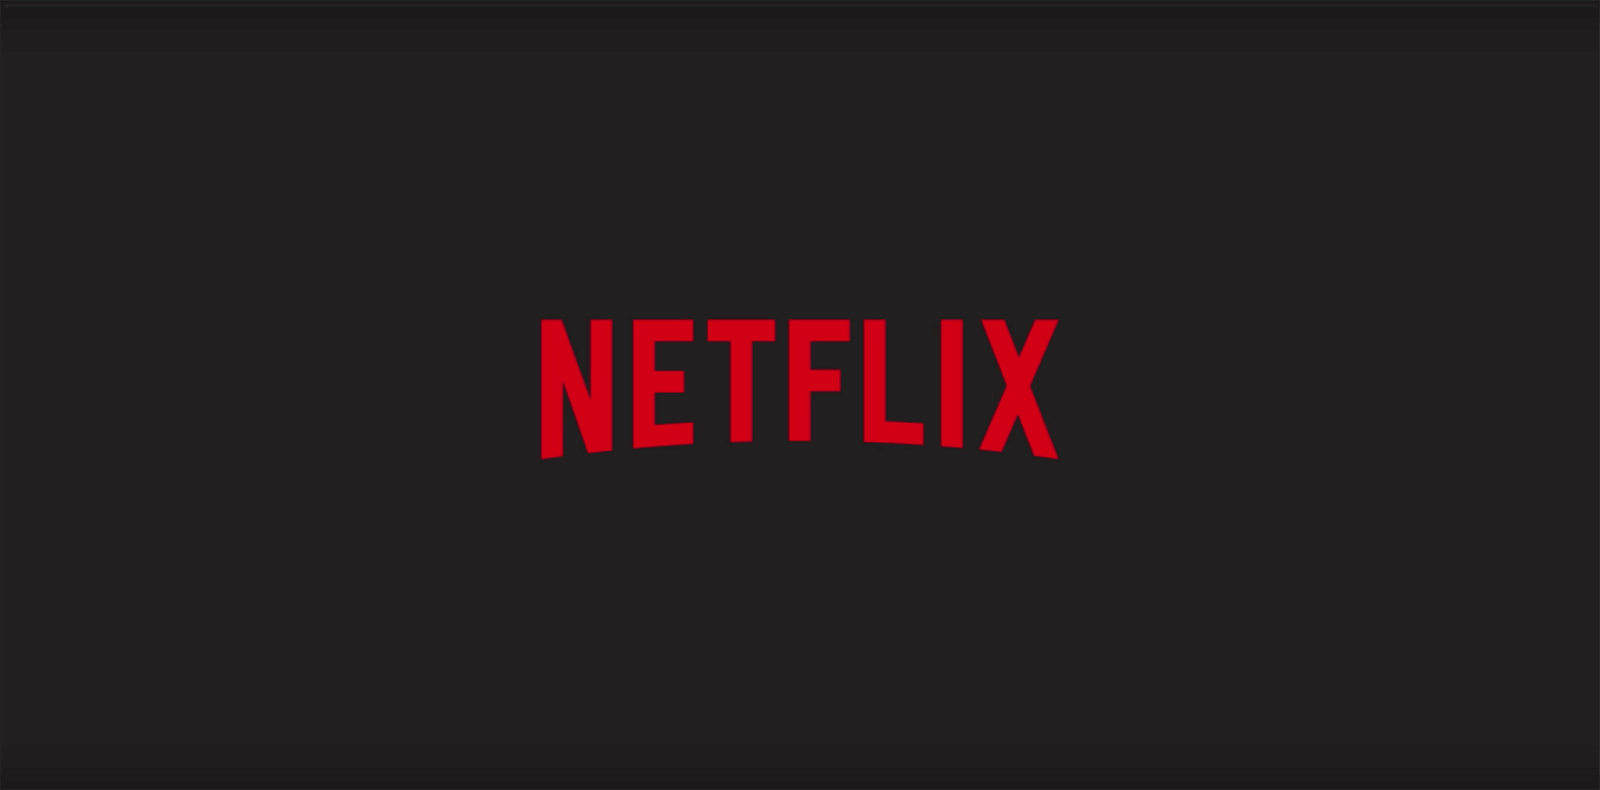

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive 
drive.mount('/content/drive')
#!pwd
%matplotlib inline

Mounted at /content/drive


In [2]:
nf = pd.read_csv('/content/drive/My Drive/NFLX.csv')
nf.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


In [3]:
nf.shape

(4874, 7)

The netflix dataset has 4874 rows with 7 columns

In [4]:
nf.info

<bound method DataFrame.info of             Date        Open        High  ...       Close   Adj Close     Volume
0     2002-05-23    1.156429    1.242857  ...    1.196429    1.196429  104790000
1     2002-05-24    1.214286    1.225000  ...    1.210000    1.210000   11104800
2     2002-05-28    1.213571    1.232143  ...    1.157143    1.157143    6609400
3     2002-05-29    1.164286    1.164286  ...    1.103571    1.103571    6757800
4     2002-05-30    1.107857    1.107857  ...    1.071429    1.071429   10154200
...          ...         ...         ...  ...         ...         ...        ...
4869  2021-09-24  592.500000  592.979980  ...  592.390015  592.390015    2124800
4870  2021-09-27  587.950012  593.580017  ...  592.640015  592.640015    2504700
4871  2021-09-28  589.000000  599.539978  ...  583.849976  583.849976    4431100
4872  2021-09-29  589.010010  609.880005  ...  599.059998  599.059998    6221000
4873  2021-09-30  608.049988  619.000000  ...  610.340027  610.340027    6612

In [5]:
a = nf.corr()
a

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999864,0.999858,0.999708,0.999708,-0.249313
High,0.999864,1.000000,0.999819,0.999868,0.999868,-0.247960
Low,0.999858,0.999819,1.000000,0.999862,0.999862,-0.250610
Close,0.999708,0.999868,0.999862,1.000000,1.000000,-0.249177
Adj Close,0.999708,0.999868,0.999862,1.000000,1.000000,-0.249177
Volume,-0.249313,-0.247960,-0.250610,-0.249177,-0.249177,1.000000


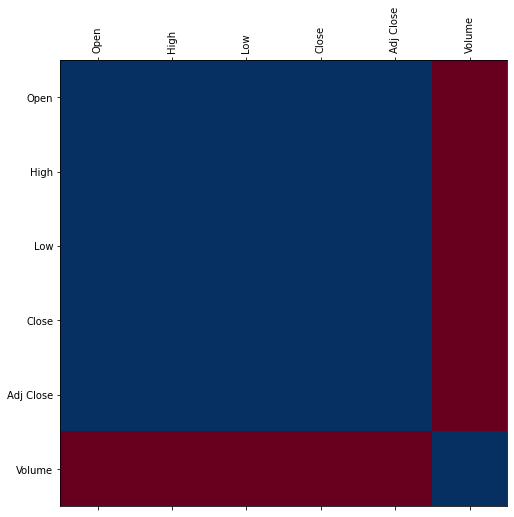

In [6]:
fig = plt.figure(figsize=(8,8))
plt.matshow(a, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(a.columns)), a.columns, rotation='vertical');
plt.yticks(range(len(a.columns)), a.columns);

In [7]:
nf.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4874.000000,4874.000000,4874.000000,4874.000000,4874.000000,4.874000e+03
mean,104.644811,106.243736,103.006660,104.686524,104.686524,1.681687e+07
std,155.886656,158.173217,153.546958,155.940368,155.940368,1.937625e+07
min,0.377857,0.410714,0.346429,0.372857,0.372857,2.856000e+05
25%,3.901429,3.977143,3.835357,3.905714,3.905714,6.301225e+06
50%,21.386429,21.816429,20.935714,21.233572,21.233572,1.084630e+07
75%,125.445000,126.592498,122.987499,125.097502,125.097502,2.016192e+07
max,608.049988,619.000000,608.049988,610.340027,610.340027,3.234140e+08


In [11]:
nf['Date']

0       2002-05-23
1       2002-05-24
2       2002-05-28
3       2002-05-29
4       2002-05-30
           ...    
4869    2021-09-24
4870    2021-09-27
4871    2021-09-28
4872    2021-09-29
4873    2021-09-30
Name: Date, Length: 4874, dtype: object

In [12]:
nf['Date_1']= pd.to_datetime(nf['Date'])
nf['Date_1']

0      2002-05-23
1      2002-05-24
2      2002-05-28
3      2002-05-29
4      2002-05-30
          ...    
4869   2021-09-24
4870   2021-09-27
4871   2021-09-28
4872   2021-09-29
4873   2021-09-30
Name: Date_1, Length: 4874, dtype: datetime64[ns]

In [21]:
nf['Year'] = pd.DatetimeIndex(nf['Date_1']).year
nf['Month'] = pd.DatetimeIndex(nf['Date_1']).month
nf['Month'].value_counts()

8     442
6     427
7     424
10    420
3     416
9     409
5     406
12    401
4     394
11    387
1     384
2     364
Name: Month, dtype: int64

In [22]:
nf['Year'].value_counts()

2008    253
2020    253
2019    252
2015    252
2016    252
2005    252
2009    252
2013    252
2004    252
2010    252
2014    252
2003    252
2011    252
2006    251
2017    251
2018    251
2007    251
2012    250
2021    188
2002    154
Name: Year, dtype: int64

In [23]:
nf['Open'].max()

608.049988

In [24]:
nf['Open'].min()

0.377857

In [25]:
nf['Open'].describe()

count    4874.000000
mean      104.644811
std       155.886656
min         0.377857
25%         3.901429
50%        21.386429
75%       125.445000
max       608.049988
Name: Open, dtype: float64

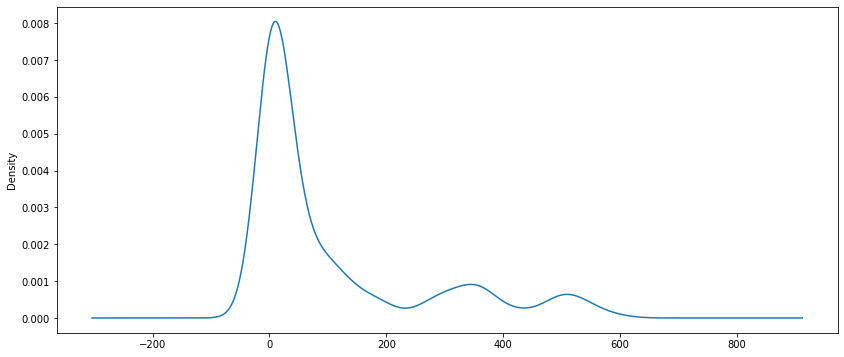

In [27]:
nf['Open'].plot(kind='density', figsize=(14,6)) # kde

In [28]:
nf['Max_difference']=nf['High']-nf['Low']
nf['Max_difference'].head()

0    0.097143
1    0.027857
2    0.075000
3    0.078572
4    0.036428
Name: Max_difference, dtype: float64

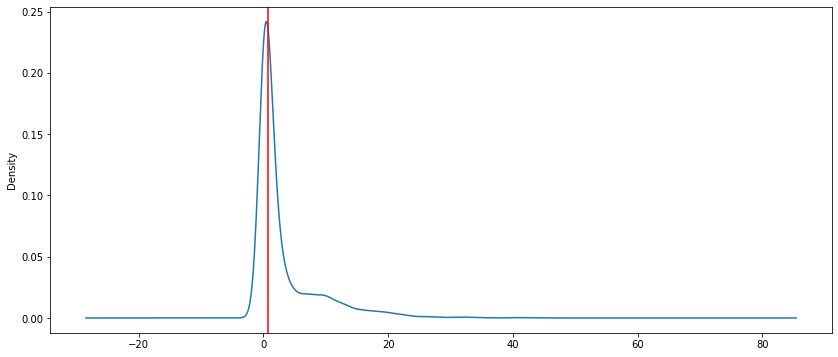

In [33]:
b= nf['Max_difference'].plot(kind='density',figsize=(14,6))
b.axvline(nf['Max_difference'].median(),color='red')

In [34]:
nf['Max_difference'].mean()

3.2370758902338923

$3 of return per share on average if transcations are timed exactly right.
Not likely sadly


In [35]:
nf['Volume'].max()

323414000

In [36]:
nf.loc[nf['Volume'] == 323414000]

,Date,Open,High,Low,Close,Adj Close,Volume,Date_1,year,month,Year,Month,Max_difference
604,2004-10-15,1.432857,1.641429,1.422857,1.471429,1.471429,323414000,2004-10-15,2004,10,2004,10,0.218572


Here is when most volume of shares were had? More context will give greater insight

In [42]:
nf.loc[(nf['Year'] == 2010) & (nf['Month'] ==4)].shape[0]

21